# Install Packages

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Loading Dataset

In [3]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Preprocessing 

In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.dropna(inplace=True)

# Encoding

In [11]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [15]:
df['ocean_proximity'] = df['ocean_proximity'].map({
    "<1H OCEAN" : 0,
    "INLAND" : 1,
    "NEAR OCEAN" : 2,
    "NEAR BAY" : 3,
    "ISLAND" : 4
})

In [16]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


# Train Test Split

In [18]:
X = df.drop("median_house_value",axis=1)
y = df["median_house_value"]

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling

In [27]:
scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [30]:
X_train.shape[1]

9

# Model training and architecture

In [32]:
model = Sequential([
    #input
    Dense(1000, input_shape=[X_train.shape[1],], activation='relu'),
    #hidden1
    Dense(500, activation='relu'),
    #hidden2
    Dense(250, activation='relu'),
    #output
    Dense(1, activation='linear'),
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1000)                │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
es = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True)

In [36]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), callbacks=es, epochs=10, batch_size=50, verbose=1)

Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 25915664384.0000 - mae: 123931.4531 - val_loss: 11384126464.0000 - val_mae: 84954.1016
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 9456740352.0000 - mae: 77075.7266 - val_loss: 7841780224.0000 - val_mae: 68912.7578
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 6356912640.0000 - mae: 60320.2305 - val_loss: 6078242304.0000 - val_mae: 58561.0000
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 5810016768.0000 - mae: 56137.9375 - val_loss: 5913410048.0000 - val_mae: 55199.2695
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 5626919936.0000 - mae: 54906.3164 - val_loss: 5688967680.0000 - val_mae: 55663.1641
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 5454567424.0000 - mae: 53861.6797 - val_loss: 5517108224.0000 - val_mae: 55006.1133
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 5279716864.0000 - mae: 52740.5234 - val_loss: 5324211712.0000 - va

# models results and metrics

In [37]:
y_pred = model.predict(X_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [43]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_squared_log_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

49640.45130968572
4861710540.637112
0.11845548885430832
0.6444865616989146


In [46]:
train_loss = history.history['loss']
Validation_loss = history.history['val_loss']
epochs = range(1,len(train_loss)+1)

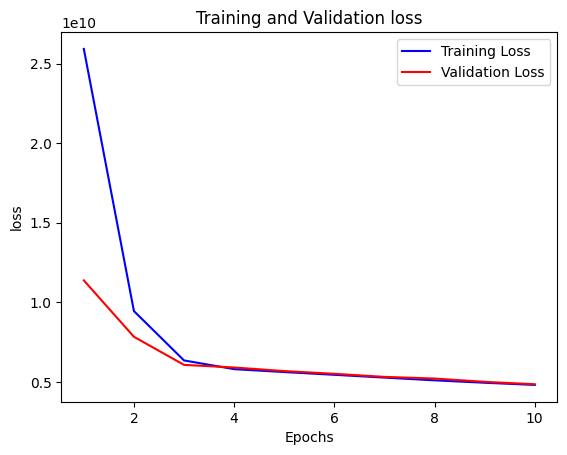

In [48]:
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, Validation_loss, 'r', label='Validation Loss')

plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [54]:
def pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximit):
    features = np.array([longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximit])
    feature_scaled = scalar.fit_transform([features])
    results = model.predict(feature_scaled).reshape(1,-1)
    return results[0]

In [55]:
longitude = -122.2300
latitude  = 37.8800
housing_median_age  = 41.0000
total_rooms        = 880.0000
total_bedrooms   =  129.0000
population     = 322.0000
households          =    126.0000
median_income       =      8.3252
ocean_proximity       =     3.0000

price = pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [56]:
price #  452600.0000 # actual value

array([271377.7], dtype=float32)

# Model save

In [57]:
model.save("model_ann.h5")

import pickle
pickle.dump(scalar,open('scaled.pkl','wb'))